# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read data

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Add column headers

In [4]:
# We see that the data doesn't contain a column header, so we will add headers A,B,C,D,...

In [5]:
column_names = [chr(i) for i in range(ord('A'),ord('A')+len(df.columns))]

In [6]:
df = pd.read_csv('income.csv',names=column_names)

In [7]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Clean the data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
A    32561 non-null int64
B    32561 non-null object
C    32561 non-null int64
D    32561 non-null object
E    32561 non-null int64
F    32561 non-null object
G    32561 non-null object
H    32561 non-null object
I    32561 non-null object
J    32561 non-null object
K    32561 non-null int64
L    32561 non-null int64
M    32561 non-null int64
N    32561 non-null object
O    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# We see columns B,D,F,G,H,I,J,N and O are object types.
# O is the income that we need to predict, so we exclude that. The rest must be converted to integers

In [10]:
def getDictionaryFromColumnValues(values):
    unique_values = values.unique()
    return {k: v for v, k in enumerate(values.unique())}

In [11]:
def replaceStringValuesInDataFrameWithIntegers(columnName):
    df.replace({columnName: getDictionaryFromColumnValues(df[columnName])},inplace=True)
    return df.head(10)

In [12]:
# Replace string values with integers
for c in ['B','D','F','G','H','I','J','N']:
    replaceStringValuesInDataFrameWithIntegers(c)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
A    32561 non-null int64
B    32561 non-null int64
C    32561 non-null int64
D    32561 non-null int64
E    32561 non-null int64
F    32561 non-null int64
G    32561 non-null int64
H    32561 non-null int64
I    32561 non-null int64
J    32561 non-null int64
K    32561 non-null int64
L    32561 non-null int64
M    32561 non-null int64
N    32561 non-null int64
O    32561 non-null object
dtypes: int64(14), object(1)
memory usage: 3.7+ MB


In [14]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,<=50K
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,<=50K
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,<=50K
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,<=50K
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,<=50K


# Normalize data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(df.drop('O',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_features = scaler.transform(df.drop('O',axis=1))

In [19]:
df_features = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [20]:
df_features.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,0.030671,-1.884600,-1.063611,-0.991584,1.134739,-0.866082,-1.378121,-1.073040,-0.353409,-0.703071,0.148453,-0.21666,-0.035429,-0.255746
1,0.837109,-1.068746,-1.008707,-0.991584,1.134739,-0.066952,-1.082793,-0.377344,-0.353409,-0.703071,-0.145920,-0.21666,-2.222153,-0.255746
2,-0.042642,-0.252892,0.245079,-0.702025,-0.420060,0.732178,-0.787465,-1.073040,-0.353409,-0.703071,-0.145920,-0.21666,-0.035429,-0.255746
3,1.057047,-0.252892,0.425801,-0.412467,-1.197459,-0.066952,-0.787465,-0.377344,1.240627,-0.703071,-0.145920,-0.21666,-0.035429,-0.255746
4,-0.775768,-0.252892,1.408176,-0.991584,1.134739,-0.066952,-0.492138,0.318352,1.240627,1.422331,-0.145920,-0.21666,-0.035429,-0.057542


# Test Train Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['O'], test_size=0.3, random_state=101)

# Using KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [26]:
pred = knn.predict(X_test)

# Evaluating Predictions

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(confusion_matrix(y_test, pred))

[[6429 1007]
 [ 941 1392]]


In [29]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

      <=50K       0.87      0.86      0.87      7436
       >50K       0.58      0.60      0.59      2333

avg / total       0.80      0.80      0.80      9769



# Choosing a k value

In [30]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error rate')

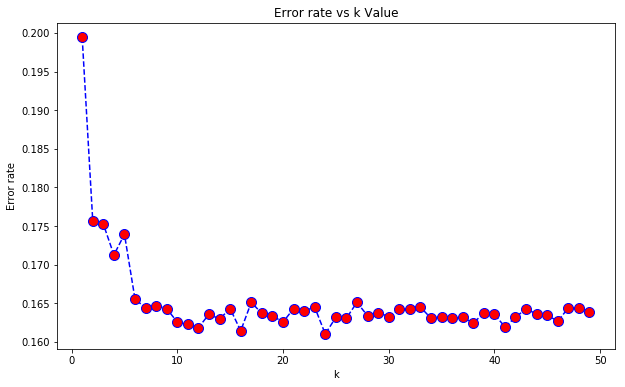

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs k Value')
plt.xlabel('k')
plt.ylabel('Error rate')

# With k = 16

In [32]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[6902  534]
 [1043 1290]]


             precision    recall  f1-score   support

      <=50K       0.87      0.93      0.90      7436
       >50K       0.71      0.55      0.62      2333

avg / total       0.83      0.84      0.83      9769



In [ ]:
# Remarks: Prediction increased from 80% to 83%